# MAKAROVA Var 1_4 параболическое уравнение.......

In [695]:
import numpy as np
import matplotlib as plt


In [696]:
def u_0_x (x):
    return((1+x)**(4/3)/25**(1/3))
def u_t_0(t):
    return((5-14*t/3)**(-2/3))
def u_t_1(t):
    return(16**(1/3)*(5-14*t/3)**(-2/3))
N = 100
h = 1/N
tau = 1/N

In [697]:
u = np.zeros([N, N]) 

In [698]:
time = [0]*N
coord = [0]*N
for i in range(N):
    time[i] = i * tau
    coord[i] = i * h
    u[0][i]=u_0_x(coord[i])
    u[i][0]=u_t_0(time[i])
    u[i][N-1] = u_t_1(time[i])

In [699]:
ppp = u.copy()

In [700]:

def a(x):
    return(x**(3/2))

In [701]:
#функция считает значение на I+1 слое
def work(I):
    #считаю ашки (a = u^3/2)
    w = u[I].copy()
    a_pl_half=[0]*(N-2)
    a_mn_half=[0]*(N-2)
    for i in range(N-2):
        a_pl_half[i]=0.5*(a(w[i+1]) + a(w[i+2]))

    for i in range(N-2):
        a_mn_half[i]=0.5*(a(w[i+1]) + a(w[i]))
    #строю 3х-диагональную матрицу
    A = [] 
    for i in range(N-2): 
        A.append([0] * (N-2) )
    norm = 4;
    while(norm > 0.01):
        #A = #это матрица n-2 на n-2, тк унас столько неизвестных(на краях есть значения уже)
        A[0][0] = - a_pl_half[0] / h**2 - a_mn_half[0] / h**2 - 1/tau;
        A[0][1]=  a_pl_half[0] / h**2
        A[N-3][N-4]= a_mn_half[N-3] / h**2
        A[N-3][N-3] = - a_pl_half[N-3] / h**2 - a_mn_half[N-3] / h**2 - 1/tau;
        j=0;
        for i in range(N-4):
           
                A[i+1][j] = a_mn_half[i+1] / h**2
                A[i+1][j+1]= - a_pl_half[i+1] / h**2 - a_mn_half[i+1] / h**2 - 1/tau;
                A[i+1][j+2] = a_pl_half[i+1] / h**2
                j=j+1;
     
        b= [0]*(N-2)
        for i in range(N-2):
            b[i] = -((u[I])[i+1])/tau   
            
        
        b[0] += - a_mn_half[0] * u_t_0(tau * I) / (h**2)
        b[N-3] += - a_pl_half[N-3] * u_t_1(tau * I) / (h**2)
    
        res= np.linalg.solve(A,b)
        #получила результат очередной итерации
       
        res_this_iter= u[I+1].copy();
        prev_res = w.copy();
        for i in range(N-2):
            res_this_iter[i+1]=res[i].copy()
        # получила целый слой с итерации (добавила границы, которые не задействовала при расчете в итерациях)   
        # теперь меняю ашки , чтобы использовать их на следующей итерации
        for i in range(N-2):
            a_pl_half [i]= 0.5 * ((prev_res[i+1])**(3/2) + 3/2 * (prev_res[i+1])**(1/2) * (res_this_iter[i+1] - prev_res[i+1]) + (prev_res[i+2])**(3/2) + 3/2 * (prev_res[i+2])**(1/2) * (res_this_iter[i+2] - prev_res[i+2]))
            a_mn_half[i] = 0.5 * ((prev_res[i+1])**(3/2) + 3/2 * (prev_res[i+1])**(1/2) * (res_this_iter[i+1] - prev_res[i+1]) + (prev_res[i])**(3/2) + 3/2 * (prev_res[i])**(1/2) * (res_this_iter[i] - prev_res[i]))
        
        norm=0;
        for i in range(N):
            norm=norm + abs(res_this_iter[i] - prev_res[i])
        #отправляю на следующую итерацию значение слоя на этой итерации    
        w = res_this_iter.copy();
    
    return(w)    

In [702]:
#заполняю всю сетку
for i in range(N-1):
    u[i+1]=work(i)


In [703]:
print(u)

[[0.34199519 0.34656271 0.35114533 ... 0.84458163 0.85030275 0.85603351]
 [0.34413985 0.34702896 0.35200075 ... 0.85020956 0.85599881 0.86717808]
 [0.34631845 0.34902332 0.35392343 ... 0.85559078 0.86139383 0.87266781]
 ...
 [1.6464755  1.5686609  1.5919116  ... 3.84735392 3.87263743 4.14885829]
 [1.76444255 1.67019859 1.69513022 ... 4.09650982 4.12336263 4.44611663]
 [1.9060938  1.78993406 1.81688121 ... 4.3903574  4.41904856 4.80305541]]


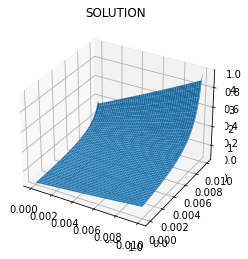

In [704]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

#create 3d axes
fig = plt.figure()
ax = plt.axes(projection='3d')

matr = np.asarray(u)
x = np.linspace(0, 1/N, N) 
y = np.linspace(0, 1/N, N) 
X, Y = np.meshgrid(x, y) 
 
ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, matr)
plt.title("SOLUTION")
plt.show()


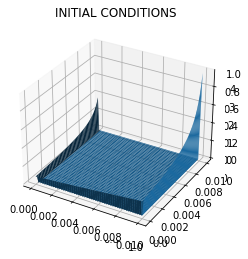

In [705]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

#create 3d axes
fig = plt.figure()
ax = plt.axes(projection='3d')

matr = np.asarray(ppp)
x = np.linspace(0, 1/N, N) 
y = np.linspace(0, 1/N, N) 
X, Y = np.meshgrid(x, y) 
 
ax = plt.axes(projection ='3d') 
ax.plot_surface(X, Y, matr)
plt.title("INITIAL CONDITIONS")
plt.show()

Все:)